In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from imageio import imread
import matplotlib.cbook as cbook
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import json
import os
import seaborn as sns
import codecs
from mplsoccer.pitch import Pitch

# 0. boisko od https://github.com/andrewRowlinson/mplsoccer

# 1. Podejście pierwsze - Dane ze Statsbomb + Football-Analytics. Pojedyńcze akcje zaznaczone na boisku (https://github.com/koushikkirugulige/Football-Analytics)

In [2]:
df = pd.read_json(r"C:\Users\snowy\Desktop\SportowaHeatmapa\open-data-master\data\events\266770.json")
df.head()

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,counterpress,duel,50_50,interception,foul_won,foul_committed,block,substitution,ball_recovery,injury_stoppage
0,8832bdcc-ffaa-481e-b4c5-754dd537bfe0,1,1,2021-12-20 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 221, 'name': 'Levante'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e44406f4-8997-4eb2-bc28-ef85947f3040,2,1,2021-12-20 00:00:00.000,0,0,"{'id': 35, 'name': 'Starting XI'}",1,"{'id': 221, 'name': 'Levante'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4fa561e9-fbc0-42dd-8d9a-8b667768f11a,3,1,2021-12-20 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 221, 'name': 'Levante'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e08f7118-06cd-4aeb-9b70-f6959a62d9be,4,1,2021-12-20 00:00:00.000,0,0,"{'id': 18, 'name': 'Half Start'}",1,"{'id': 221, 'name': 'Levante'}","{'id': 1, 'name': 'Regular Play'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ae4bfff7-2a40-43e5-8d8b-2a8a4331354c,5,1,2021-12-20 00:00:00.225,0,0,"{'id': 30, 'name': 'Pass'}",2,"{'id': 221, 'name': 'Levante'}","{'id': 9, 'name': 'From Kick Off'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
shotL = df[(df.possession_team =={'id': 221, 'name': 'Levante'}) & (df.type == {'id': 30, 'name': 'Pass'})] 
shotB = df[(df.possession_team =={'id': 217, 'name': 'Barcelona'}) & (df.type == {'id': 30, 'name': 'Pass'})] 

In [4]:
df_L = pd.DataFrame(shotL.location)
df_L[['X_axis','Y_axis']] = pd.DataFrame(shotL.location.values.tolist(), index= shotL.location.index)

In [5]:
df_B = pd.DataFrame(shotB.location)
df_B[['X_axis','Y_axis']] = pd.DataFrame(shotB.location.values.tolist(), index= shotB.location.index)

In [6]:
x_axis_L = df_L.X_axis.values.tolist()
y_axis_L = df_L.Y_axis.values.tolist()

x_axis_B = df_B.X_axis.values.tolist()
y_axis_B = df_B.Y_axis.values.tolist()

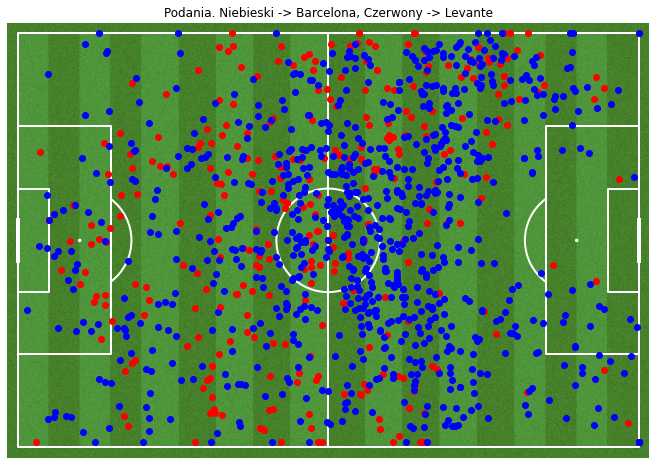

In [7]:
fig ,ax = plt.subplots(figsize=(13.5,8))

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(13, 8),
              constrained_layout=False, tight_layout=True) #overlay our different objects on the pitch
pitch.draw(ax=ax)
ax.plot(x_axis_L,y_axis_L,'ro')
ax.plot(x_axis_B,y_axis_B,'bo')

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title("Podania. Niebieski -> Barcelona, Czerwony -> Levante")
plt.show()

C:\Users\snowy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


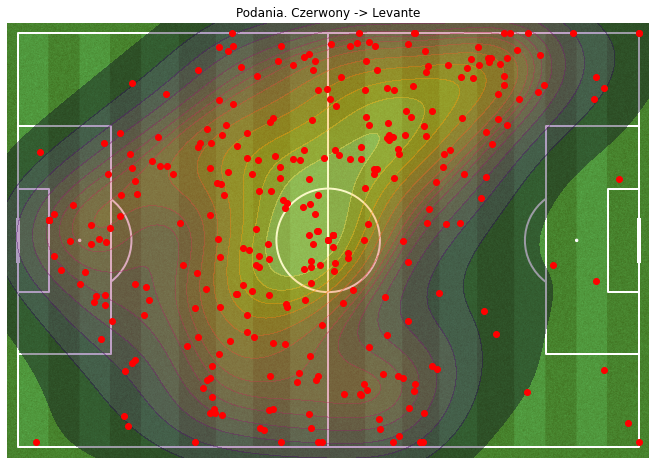

In [8]:
fig ,ax = plt.subplots(figsize=(13.5,8))

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(13, 8),
              constrained_layout=False, tight_layout=True) #overlay our different objects on the pitch
pitch.draw(ax=ax)
ax.plot(x_axis_L,y_axis_L,'ro')

kde = sns.kdeplot(
        df_L['X_axis'],
        df_L['Y_axis'],
        shade = True,
        shade_lowest=False,
        alpha=.4,
        n_levels=15,
        cmap = 'inferno')

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title("Podania. Czerwony -> Levante")
plt.show()

C:\Users\snowy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


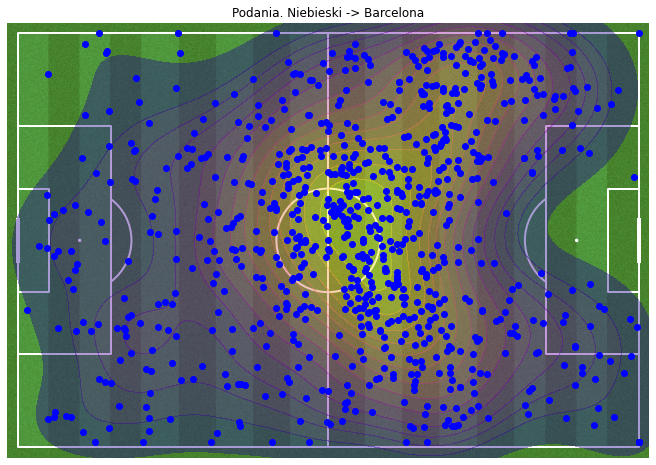

In [9]:
fig ,ax = plt.subplots(figsize=(13.5,8))

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(13, 8),
              constrained_layout=False, tight_layout=True) #overlay our different objects on the pitch
pitch.draw(ax=ax)
ax.plot(x_axis_B,y_axis_B,'bo')

kde = sns.kdeplot(
        df_B['X_axis'],
        df_B['Y_axis'],
        shade = True,
        shade_lowest=False,
        alpha=.4,
        n_levels=15,
        cmap = 'plasma')

plt.ylim(-2, 82)
plt.xlim(-2, 122)
plt.title("Podania. Niebieski -> Barcelona")
plt.show()

### W Analogiczny sposób możemy stworzyć mapy do wszystkich innych sytuacji na boisku

# 2. Podejście drugie - Dane od (https://github.com/mckayjohns) + Mapa podań + heatmapa

In [10]:
df = pd.read_csv('messibetis.csv')

In [11]:
df

,player,minute,second,x,y,type,outcome,endX,endY
0,messi,45,0,50,50,Pass,Successful,40,43
1,messi,45,25,63,48,Pass,Successful,75,83
2,messi,46,4,74,58,Pass,Successful,71,65
3,messi,46,7,76,68,Pass,Successful,95,78
4,messi,46,55,100,1,Pass,Unsuccessful,96,38
5,messi,47,42,73,25,Pass,Successful,70,54
6,messi,49,47,75,43,Pass,Unsuccessful,82,38
7,messi,50,10,79,31,Pass,Successful,87,24
8,messi,50,17,82,52,Pass,Successful,93,68
9,messi,50,24,98,62,Pass,Unsuccessful,98,61


In [12]:
df['x'] = df['x']*1.2
df['y'] = df['y']*.8
df['endX'] = df['endX']*1.2
df['endY'] = df['endY']*.8

C:\Users\snowy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Mapa podań - Messi. Fiolet -> Poprawne, Zółty -> Nieudane')

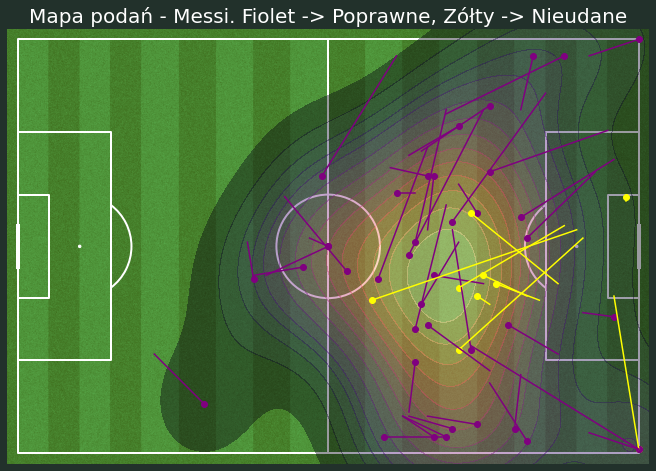

In [13]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(13, 8),constrained_layout=False, tight_layout=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.4,
        n_levels=15,
        cmap = 'magma'
)

for x in range(len(df['x'])):
    if df['outcome'][x] == 'Successful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='purple')
        plt.scatter(df['x'][x],df['y'][x],color='purple')
    if df['outcome'][x] == 'Unsuccessful':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='yellow')
        plt.scatter(df['x'][x],df['y'][x],color='yellow')
        
plt.xlim(-2,122)
plt.ylim(-2,82)

plt.title('Mapa podań - Messi. Fiolet -> Poprawne, Zółty -> Nieudane',color='white',size=20)

# 3. Podejście 3. Połączenie 1 i 2 z https://github.com/koushikkirugulige/Football-Analytics/blob/master/BarcaGoalLocByManagers.ipynb

In [14]:
#change this cell to change season and player name
season = ['2017/2018','2018/2019','2019/2020']
length = int(20)

In [15]:
main_df = pd.DataFrame(data=None)
path_match = "open-data-master\data\events\\" #location for play by play events
for root, dirs, files in os.walk('open-data-master\data\matches'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('\\') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = pd.json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            for i in range(len(df)):
                if df.iloc[i]['competition_country_name'] == 'Spain'  and df.iloc[i]['season_season_name'] in season :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    #print('match list \n',match_no)
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = pd.json_normalize(df_match,sep="_")    
                        df_match2 =  df_match2[(df_match2['type_name'] == "Shot") & (df_match2['team_name'] == 'Sevilla')]
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
#print('total matches ',len(match_no)) 
print('Done')

Done


In [16]:
df = main_df.loc[:,['location','shot_body_part_id','shot_end_location','shot_outcome_id','player_name','player_id']]

In [17]:
df

,location,shot_body_part_id,shot_end_location,shot_outcome_id,player_name,player_id
0,"[111.1, 28.5]",40.0,"[112.1, 30.1]",96.0,Carlos Joaquín Correa,6822.0
1,"[106.8, 26.5]",38.0,"[108.3, 28.0]",96.0,Franco Damián Vázquez,6719.0
2,"[118.8, 39.0]",37.0,"[120.0, 32.5, 0.5]",98.0,Luis Fernando Muriel Fruto,6334.0
3,"[113.5, 26.3]",38.0,"[119.7, 61.5]",101.0,Luis Fernando Muriel Fruto,6334.0
4,"[112.0, 40.2]",37.0,"[120.0, 34.0, 1.3]",98.0,Carlos Joaquín Correa,6822.0
...,...,...,...,...,...,...
81,"[106.2, 53.0]",40.0,"[120.0, 42.0, 5.0]",98.0,Lucas Ariel Ocampos,4345.0
82,"[104.2, 23.3]",40.0,"[110.0, 29.1]",96.0,Éver Maximiliano David Banega,5504.0
83,"[96.9, 43.5]",38.0,"[107.9, 41.6]",96.0,Munir El Haddadi Mohamed,6616.0
84,"[113.1, 36.4]",40.0,"[120.0, 30.8, 0.2]",98.0,Javier Hernández Balcázar,3058.0


In [18]:
df['player_name'].value_counts()

Luis Fernando Muriel Fruto       13
Pablo Sarabia García              7
Éver Maximiliano David Banega     7
Franco Damián Vázquez             7
Wissam Ben Yedder                 7
Lucas Ariel Ocampos               6
Jesús Navas González              5
Luuk de Jong                      4
Carlos Joaquín Correa             3
Guido Hernán Pizarro              3
Munir El Haddadi Mohamed          2
Sergio Reguilón Rodríguez         2
Gabriel Iván Mercado              2
Daniel Filipe Martins Carriço     2
Simon Thorup Kjær                 2
Miguel Arturo Layún Prado         2
Javier Hernández Balcázar         1
Fernando Francisco Reges          1
Sergio Escudero Palomo            1
Roque Mesa Quevedo                1
André Miguel Valente Silva        1
Quincy Anton Promes               1
Sergi Gómez Solà                  1
Joan Jordán Moreno                1
Jules Koundé                      1
Marko Rog                         1
Manuel Agudo Durán                1
Guilherme Antonio Arana Lope

In [19]:
df['shot_outcome_id'].value_counts()

98.0     30
96.0     25
100.0    19
97.0      6
101.0     4
99.0      2
Name: shot_outcome_id, dtype: int64

In [20]:
df_goal = df[(df['shot_outcome_id'] == 97) & (df['player_id'] == 6334.0)]
df_shot = df[(df['shot_outcome_id'] != 97) & (df['player_id'] == 6334.0)]
df_goal.head()

,location,shot_body_part_id,shot_end_location,shot_outcome_id,player_name,player_id
9,"[107.0, 38.0]",40.0,"[120.0, 36.3, 0.3]",97.0,Luis Fernando Muriel Fruto,6334.0
47,"[103.3, 28.7]",40.0,"[120.0, 43.4, 0.6]",97.0,Luis Fernando Muriel Fruto,6334.0


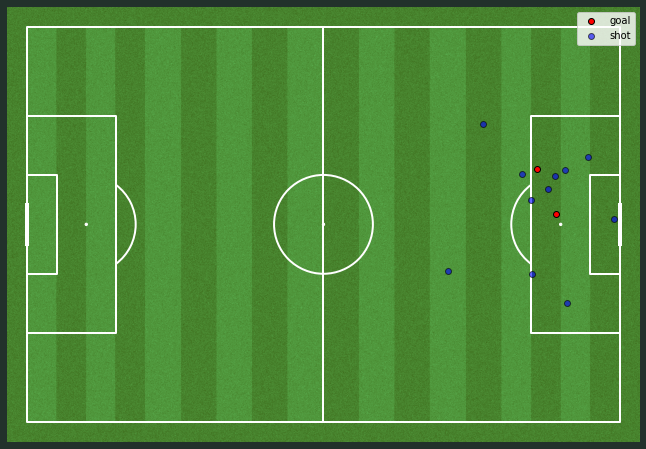

In [21]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_color='grass', line_color='white', stripe=True, figsize=(13, 8),constrained_layout=False, tight_layout=True)
pitch.draw(ax=ax)



for i in range(len(df_goal)):
    xe = df_goal.iloc[i]['location'][0]
    ye = df_goal.iloc[i]['location'][1]
    g = plt.scatter(xe,ye,color="red",edgecolors="black",zorder=10,alpha=1)
for i in range(len(df_shot)):
    xe = df_shot.iloc[i]['location'][0]
    ye = df_shot.iloc[i]['location'][1]
    s = plt.scatter(xe,ye,color="blue",edgecolors="black",zorder=5,alpha=0.6) 
    
plt.legend((g,s),('goal','shot'),scatterpoints=1,loc=0)
